In [30]:
import os
os.chdir(r'D:\Python Training\ML\Dataset')

import pandas as pd
infile = pd.read_csv('serverrequest.csv')
infile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96433 entries, 0 to 96432
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  96433 non-null  object 
 1   Requests  91878 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [37]:
#infile['Requests'].isna().value_counts()
infile['Requests'].notnull().value_counts()

True     91878
False     4555
Name: Requests, dtype: int64

In [38]:
infile['Requests'].notnull()

0        True
1        True
2        True
3        True
4        True
         ... 
96428    True
96429    True
96430    True
96431    True
96432    True
Name: Requests, Length: 96433, dtype: bool

In [43]:
cleanfile = infile.loc[ infile['Requests'].notnull()   ,  : ]
cleanfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91878 entries, 0 to 96432
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  91878 non-null  object 
 1   Requests  91878 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.1+ MB


In [ ]:
cleanfile = infile.dropna()
cleanfile.info()

In [45]:
cleanfile.head(2)

,Datetime,Requests
0,01-01-2004 00:00,2554.0
1,01-01-2004 01:00,15922.0


In [52]:
cleanfile['ProcessDate']  =  pd.to_datetime(cleanfile['Datetime'])

<ipython-input-52-9e754624b5f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanfile['ProcessDate']  =  pd.to_datetime(cleanfile['Datetime'])


In [55]:
cleanfile.head(2)

,Datetime,Requests,ProcessDate
0,01-01-2004 00:00,2554.0,2004-01-01 00:00:00
1,01-01-2004 01:00,15922.0,2004-01-01 01:00:00


In [60]:
cleanfile.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 91878 entries, 0 to 96432
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     91878 non-null  object        
 1   Requests     91878 non-null  float64       
 2   ProcessDate  91878 non-null  datetime64[ns]
 3   DayofWeek    91878 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.5+ MB


In [61]:
from datetime import datetime as dt

cleanfile['DayofWeek'] = cleanfile['ProcessDate'].dt.strftime('%w-%a')
cleanfile['TimeofDay'] = cleanfile['ProcessDate'].dt.strftime('%H')


<ipython-input-61-5cb7714e00bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanfile['DayofWeek'] = cleanfile['ProcessDate'].dt.strftime('%w-%a')
<ipython-input-61-5cb7714e00bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanfile['TimeofDay'] = cleanfile['ProcessDate'].dt.strftime('%H')


In [66]:
pivotout = cleanfile.pivot_table(index="DayofWeek",columns="TimeofDay",values="Requests",aggfunc="mean")

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

<AxesSubplot:xlabel='TimeofDay', ylabel='DayofWeek'>

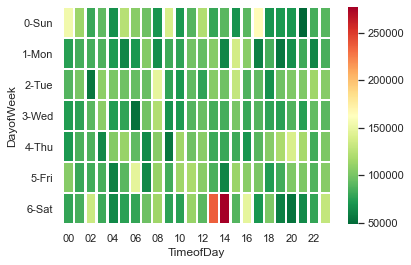

In [71]:
sns.heatmap(pivotout, linewidths=1.5,cmap="RdYlGn_r")